In [3]:
import sys
sys.path.insert(0, 'python')
import cv2
import model
import util
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np
from pathlib import Path
%matplotlib inline

body_estimation = Body('model/body_pose_model.pth')

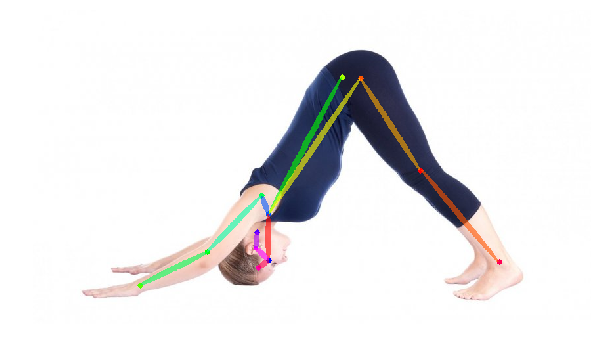

In [14]:
test_image = 'x.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.figure(figsize=(10,15))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [15]:
cv2.imwrite('res.png', canvas)

True

In [6]:
ims = Path('asana_gt/')

In [8]:
for pose_im_path in list(ims.iterdir()):
    pose_name = str(pose_im_path).split('/')[-1]
    pose_name = pose_name.split('.')[0]
    if(pose_name):
        oriImg = cv2.imread(str(pose_im_path))  # B,G,R order
        candidate, subset = body_estimation(oriImg)
        canvas = copy.deepcopy(oriImg)
        canvas = util.draw_bodypose(canvas, candidate, subset)
        cv2.imwrite('coco-model-results/'+pose_name+'-res.png', canvas)

In [10]:
cv2.imwrite('res.png', canvas)

True